### Lets make pictures

In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_pickle('.././data/pickle/pypf_prep.pkl')
df.index = df.Year
#df1 = df #lets save this result
#df = df[df['Agegroup'] != 'ALL AGES'] #lets throw away all ages rows

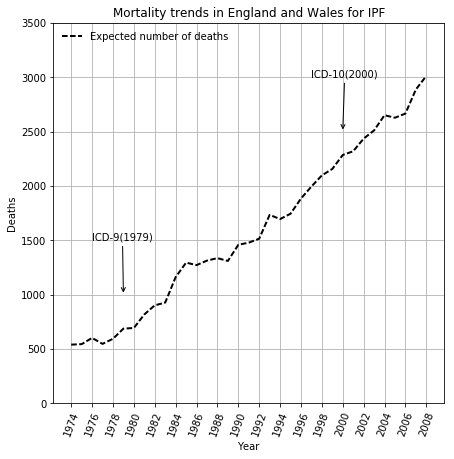

In [3]:
#graph a la Navaratnam 2011

grp = df[(df['Cause'] == 'IPF') & (df['Year'] < pd.to_datetime('2009')) & (df['Agegroup'] == 'ALL AGES')].groupby('Year')

data = grp['Estimated deaths age standardised to 2008 population'].sum()

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

plt.xticks(rotation=70)
plt.ylim((0,3500))
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Mortality trends in England and Wales for IPF')

plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
               arrowprops=dict(arrowstyle="->")) 
plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
               arrowprops=dict(arrowstyle="->")) 
plt.grid(True)
p1, = plt.plot(x, y, 'k--', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)
ax.legend([p1], ["Expected number of deaths"], loc='upper left', frameon=False)

#ax.xaxis.set_minor_locator(minor)

plt.savefig('.././fig/IPF mortality trends in England and Wales to 2008.png')

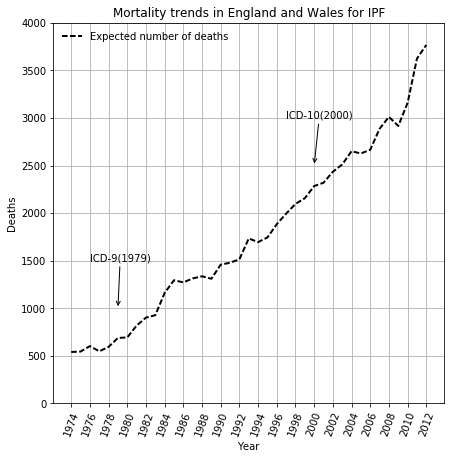

In [4]:
#graph a la Navaratnam 2011

grp = df[(df['Cause'] == 'IPF') &(df['Agegroup'] == 'ALL AGES')].groupby('Year')

data = grp['Estimated deaths age standardised to 2008 population'].sum()

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

plt.xticks(rotation=70)
plt.ylim((0,4000))
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Mortality trends in England and Wales for IPF')

plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
               arrowprops=dict(arrowstyle="->")) 
plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
               arrowprops=dict(arrowstyle="->")) 
plt.grid(True)
p1, = plt.plot(x, y, 'k--', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)
ax.legend([p1], ["Expected number of deaths"], loc='upper left', frameon=False)

#ax.xaxis.set_minor_locator(minor)

plt.savefig('.././fig/IPF mortality trends in England and Wales to 2012.png')

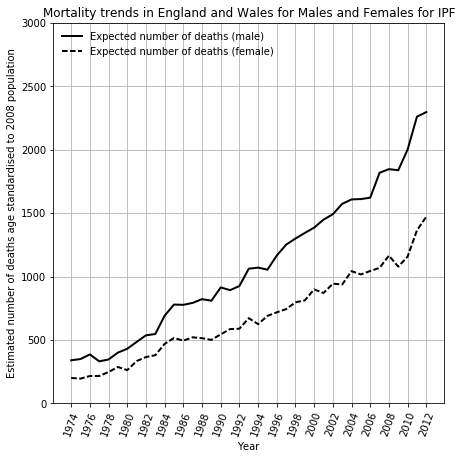

In [5]:
grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')].groupby('Year')
data = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female') & (df['Agegroup'] == 'ALL AGES')].groupby('Year')
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values


plt.xticks(rotation=70)

plt.ylim((0,3000))
plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Year')
plt.title('Mortality trends in England and Wales for Males and Females for IPF')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
plt.grid(True)
p1, = plt.plot(x, y, 'k-', linewidth=2.0) 
p2, = plt.plot(x1, y1,'k--', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)
ax.legend([p1, p2], ["Expected number of deaths (male)", "Expected number of deaths (female)"], loc='upper left', frameon=False)

plt.savefig('.././fig/IPF mortality trends in England and Wales for Males and Females.png')

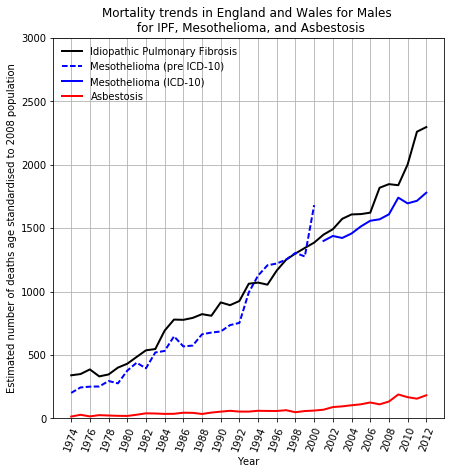

In [6]:
df_male = df[(df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')]

grp = df_male[df_male['Cause'] == 'IPF'].groupby('Year')
data = grp['Estimated deaths age standardised to 2008 population'].sum()


grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] < pd.to_datetime('2001'))].groupby('Year') 
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()#all meso

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] > pd.to_datetime('2000'))].groupby('Year') 
data2 = grp['Estimated deaths age standardised to 2008 population'].sum()#all meso

grp = df_male[df_male['Cause'] == 'Asbestosis'].groupby('Year')
data3 = grp['Estimated deaths age standardised to 2008 population'].sum()

#grp = df_male[df_male['Cause'] == 'Mesothelioma_other'].groupby('Year') #all non pulmonary
#data = grp['Estimated deaths age standardised to 2008 population'].sum() 

#grp = df_male[df_male['Cause'] == 'Mesothelioma'].groupby('Year') #pulmonary
#data1 = grp['Estimated deaths age standardised to 2008 population'].sum()


#make an (ugly) graph a la Navaratnam
#grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Male')].groupby('Year')
#data = grp['Estimated deaths age standardised to 2008 population'].sum()

#grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Female')].groupby('Year')
#data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values

x2 = data2.index
y2 = data2.values

x3 = data3.index
y3 = data3.values

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()
plt.xticks(rotation=70)

plt.ylim((0,3000))
plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Year')
plt.title('Mortality trends in England and Wales for Males \n for IPF, Mesothelioma, and Asbestosis')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
plt.grid(True)
p1, = plt.plot(x, y, 'k-', linewidth=2.0) 
p2, = plt.plot(x1, y1,'b--', linewidth=2.0) 
p3, = plt.plot(x2, y2, 'b-', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'r-', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)
ax.legend([p1, p2, p3, p4], ["Idiopathic Pulmonary Fibrosis", "Mesothelioma (pre ICD-10)", "Mesothelioma (ICD-10)", "Asbestosis"], loc='upper left', frameon=False)

plt.savefig('.././fig/IPF mortality trends in England and Wales for Males for IPF, Mesothelioma, and Asbestosis.png')

In [7]:
df_male = df[(df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')]

grp = df_male[df_male['Cause'] == 'IPF'].groupby('Year')
data = DataFrame(grp['Estimated deaths age standardised to 2008 population'].sum())
data = data.pct_change()


grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] < pd.to_datetime('2001'))].groupby('Year') 
data1 = DataFrame(grp['Estimated deaths age standardised to 2008 population'].sum())#all meso
data1 = data1.pct_change()


grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] > pd.to_datetime('2000'))].groupby('Year') 
data2 = DataFrame(grp['Estimated deaths age standardised to 2008 population'].sum())#all meso
data2 = data2.pct_change()



grp = df_male[df_male['Cause'] == 'Asbestosis'].groupby('Year')
data3 = DataFrame(grp['Estimated deaths age standardised to 2008 population'].sum())
data3 = data3.pct_change()



#grp = df_male[df_male['Cause'] == 'Mesothelioma_other'].groupby('Year') #all non pulmonary
#data = grp['Estimated deaths age standardised to 2008 population'].sum() 

#grp = df_male[df_male['Cause'] == 'Mesothelioma'].groupby('Year') #pulmonary
#data1 = grp['Estimated deaths age standardised to 2008 population'].sum()


#make an (ugly) graph a la Navaratnam
#grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Male')].groupby('Year')
#data = grp['Estimated deaths age standardised to 2008 population'].sum()

#grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Female')].groupby('Year')
#data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

In [8]:
df1 = DataFrame(data1)

In [9]:
data.values

array([[        nan],
       [ 0.0293261 ],
       [ 0.10409772],
       [-0.14198728],
       [ 0.04576732],
       [ 0.15554248],
       [ 0.07613366],
       [ 0.12430156],
       [ 0.10774118],
       [ 0.01907658],
       [ 0.26515021],
       [ 0.12604908],
       [-0.00271688],
       [ 0.0195477 ],
       [ 0.03745367],
       [-0.01545349],
       [ 0.12985665],
       [-0.0236159 ],
       [ 0.03681614],
       [ 0.14705037],
       [ 0.00837537],
       [-0.01525441],
       [ 0.10592986],
       [ 0.07317156],
       [ 0.03895109],
       [ 0.03361469],
       [ 0.03121786],
       [ 0.04545206],
       [ 0.02945093],
       [ 0.05483315],
       [ 0.02212873],
       [ 0.00171588],
       [ 0.00684932],
       [ 0.12112405],
       [ 0.01568766],
       [-0.00456942],
       [ 0.08870428],
       [ 0.12925826],
       [ 0.01619492]])

In [10]:
np.corrcoef(data.values, data1.values)[0, 1]

/home/drcjar/.virtualenvs/litsearch/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/drcjar/.virtualenvs/litsearch/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/home/drcjar/.virtualenvs/litsearch/local/lib/python2.7/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


nan

In [11]:
print data.mean()
print data1.mean()
print data2.mean()
print data3.mean()

Estimated deaths age standardised to 2008 population    0.053762
dtype: float64
Estimated deaths age standardised to 2008 population    0.092655
dtype: float64
Estimated deaths age standardised to 2008 population    0.022435
dtype: float64
Estimated deaths age standardised to 2008 population    0.094559
dtype: float64


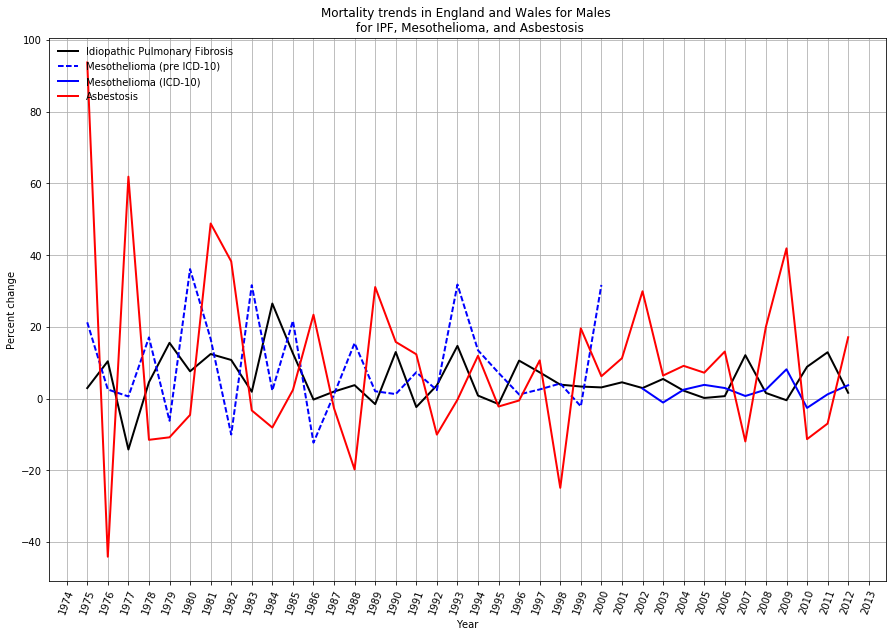

In [12]:
plt.figure(figsize=(15, 10))
x = data.index
y = data.values * 100

x1 = data1.index
y1 = data1.values * 100

x2 = data2.index
y2 = data2.values * 100

x3 = data3.index
y3 = data3.values * 100

major = mdates.YearLocator(1)
minor = mdates.MonthLocator()
plt.xticks(rotation=70)

#plt.ylim((0,100))
plt.ylabel('Percent change')
plt.xlabel('Year')
plt.title('Mortality trends in England and Wales for Males \n for IPF, Mesothelioma, and Asbestosis')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
plt.grid(True)
p1, = plt.plot(x, y, 'k-', linewidth=2.0) 
p2, = plt.plot(x1, y1,'b--', linewidth=2.0) 
p3, = plt.plot(x2, y2, 'b-', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'r-', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)
ax.legend([p1, p2, p3, p4], ["Idiopathic Pulmonary Fibrosis", "Mesothelioma (pre ICD-10)", "Mesothelioma (ICD-10)", "Asbestosis"], loc='upper left', frameon=False)

plt.savefig('.././fig/IPF mortality trends in England and Wales for Males for IPF, Mesothelioma, and Asbestosis.png')

### Lets make mortality rate with confidence intervals as per navaratum

In [13]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    #eturn m, m-h, m+h
    return '%.2f (%.2f - %.2f)' % (m, m-h, m+h)

In [14]:
#for a given period and cause this function calculates the national period population (in person-years), number of deaths 
#in the period and the standardised (to a 2008 population) number of deaths using our data by rolling up the region numbers
#and years


def year_analysis(period, cause):
    perpop = []
    perdeath = []
    perstddeath = []
    
    for i, item in enumerate(period):
        regpop = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region').Population.sum()
        natpop = sum(regpop)
        perpop.append(natpop)
        
        regdeath = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region')['Deaths'].sum()
        natdeath = sum(regdeath)
        perdeath.append(natdeath)  
        
        regstddeath = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region')['Estimated deaths age standardised to 2008 population'].sum()
        natstddeath = sum(regstddeath)
        perstddeath.append(natstddeath)  
        
    n_years = len(period)
    
    period = ('%s - %s' % (period[0], period[n_years - 1]))
    
    deaths = sum(perdeath)
    
    person_years = ('%i' % (sum(perpop) / 1000000))
     
    standardised_deaths = ('%i' % sum(perstddeath))
    
    stdperrate = [(d / 54454723) * 100000 for d in perstddeath] #54454723 is 2008 nat pop
    
    stdperrate = mean_confidence_interval(stdperrate)
    
    return period, deaths, person_years, standardised_deaths, stdperrate
    
    
#corrected meso is a special case...


def year_analysis2(period, cause):
    perpop = []
    perdeath = []
    perstddeath = []
    
    for i, item in enumerate(period):
        regpop = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region').Population.sum()
        natpop = sum(regpop)
        perpop.append(natpop)
        
        regdeath = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region')['Deaths'].sum()
        natdeath = sum(regdeath)
        perdeath.append(natdeath)  
        
        regstddeath = df[(df['Agegroup'] == 'ALL AGES') & (df['Year'] == pd.to_datetime(period[i])) & (df['Cause'] == cause)].groupby('Region')['Corrected Meso Deaths'].sum()
        natstddeath = sum(regstddeath)
        perstddeath.append(natstddeath)  
        
    n_years = len(period)
    
    period = ('%s - %s' % (period[0], period[n_years - 1]))
    
    deaths = sum(perdeath)
    
    person_years = ('%i' % (sum(perpop) / 1000000))
     
    standardised_deaths = ('%i' % sum(perstddeath))
    
    stdperrate = [(d / 54454723) * 100000 for d in perstddeath] #54454723 is 2008 nat pop
    
    stdperrate = mean_confidence_interval(stdperrate)
    
    return period, deaths, person_years, standardised_deaths, stdperrate
    

        
    

        

In [15]:
periods = {}
periods[0] = ['1979', '1980', '1981', '1982', '1983']
periods[1] = ['1984', '1985', '1986', '1987', '1988']
periods[2] = ['1989', '1990', '1991', '1992', '1993', '1994']
periods[3] = ['1995', '1996', '1997', '1998', '1999', '2000']
periods[4] = ['2001', '2002', '2003', '2004']
periods[5] = ['2005', '2006', '2007', '2008']
periods[6] = ['2009', '2010', '2011', '2012']

ipf_results = []
asbestos_results = []
all_meso_results = []
cor_meso_results = []

for i, item in enumerate(periods):
    ipf_results.append(year_analysis(periods[i], 'IPF'))
    asbestos_results.append(year_analysis(periods[i], 'Asbestosis'))
    all_meso_results.append(year_analysis(periods[i], 'All Mesothelioma'))
    
    
dfipf = pd.DataFrame(ipf_results, columns=['Period', 'Deaths', 'Person years (million)', 'Standardised Deaths (2008 population)', 'Standardised mortality rate per 100,000 (95% CI)'])
dfasb = pd.DataFrame(asbestos_results, columns=['Period', 'Deaths', 'Person years (million)', 'Standardised Deaths (2008 population)', 'Standardised mortality rate per 100,000 (95% CI)'])
dfmes1 = pd.DataFrame(all_meso_results, columns=['Period', 'Deaths', 'Person years (million)', 'Standardised Deaths (2008 population)', 'Standardised mortality rate per 100,000 (95% CI)'])



In [16]:
dfmes1 = dfmes1[dfmes1['Deaths'] != 0] #throw away rows we lack data for
dfmes = pd.concat([dfmes1]) #combine 
dfmes = dfmes.sort() #sort

/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


In [17]:
dfipf

,Period,Deaths,Person years (million),Standardised Deaths (2008 population),"Standardised mortality rate per 100,000 (95% CI)"
0,1979 - 1983,3846.0,247,4029,1.48 (1.22 - 1.74)
1,1984 - 1988,5851.0,249,6378,2.34 (2.19 - 2.50)
2,1989 - 1994,8584.0,304,9192,2.81 (2.51 - 3.12)
3,1995 - 2000,11548.0,310,12162,3.72 (3.35 - 4.10)
4,2001 - 2004,9597.0,210,9917,4.55 (4.15 - 4.96)
5,2005 - 2008,11089.0,215,11193,5.14 (4.60 - 5.67)
6,2009 - 2012,13770.0,222,13470,6.18 (5.02 - 7.35)


In [18]:
dfasb

,Period,Deaths,Person years (million),Standardised Deaths (2008 population),"Standardised mortality rate per 100,000 (95% CI)"
0,1979 - 1983,172.0,247,170,0.06 (0.04 - 0.09)
1,1984 - 1988,208.0,249,227,0.08 (0.07 - 0.10)
2,1989 - 1994,325.0,304,349,0.11 (0.10 - 0.12)
3,1995 - 2000,348.0,310,367,0.11 (0.10 - 0.12)
4,2001 - 2004,364.0,210,376,0.17 (0.13 - 0.22)
5,2005 - 2008,495.0,215,500,0.23 (0.20 - 0.26)
6,2009 - 2012,723.0,222,708,0.33 (0.28 - 0.37)


In [19]:
dfmes

,Period,Deaths,Person years (million),Standardised Deaths (2008 population),"Standardised mortality rate per 100,000 (95% CI)"
0,1979 - 1983,2446.223216,247,2540,0.93 (0.72 - 1.15)
1,1984 - 1988,3192.247558,249,3491,1.28 (1.17 - 1.40)
2,1989 - 1994,5453.305493,304,5875,1.80 (1.39 - 2.21)
3,1995 - 2000,8816.424768,310,9298,2.85 (2.42 - 3.27)
4,2001 - 2004,6502.000000,210,6741,3.10 (3.01 - 3.18)
5,2005 - 2008,7368.000000,215,7448,3.42 (3.20 - 3.64)
6,2009 - 2012,8474.000000,222,8290,3.81 (3.68 - 3.93)


In [20]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')].Deaths.sum()

41249.0

In [21]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female') & (df['Agegroup'] == 'ALL AGES')].Deaths.sum()

25992.0

In [22]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')].Population.sum() / 1000000

980.56322699999998

In [23]:
df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female') & (df['Agegroup'] == 'ALL AGES')].Population.sum() / 1000000

1028.579778

In [24]:
grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male') & (df['Agegroup'] == 'ALL AGES')].groupby('Year')
grp = grp['Estimated deaths age standardised to 2008 population'].sum()
grp = DataFrame(grp).reset_index()
grp['Estimated deaths age standardised to 2008 population'].map(lambda x: (x/54454723) * 100000).mean()

2.006538435815437

In [25]:
grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female') & (df['Agegroup'] == 'ALL AGES')].groupby('Year')
grp = grp['Estimated deaths age standardised to 2008 population'].sum()
grp = DataFrame(grp).reset_index()
grp['Estimated deaths age standardised to 2008 population'].map(lambda x: (x/54454723) * 100000).mean()

1.250705869329551

In [26]:
2 / 1.25

1.6

In [27]:
grp = df[(df['Cause'] == 'IPF')].groupby('Agegroup')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp

/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Agegroup
UNDER 25     0.021286
25-34        0.048154
35-44        0.164044
45-54        0.731656
55-64        3.363908
ALL AGES     3.445875
65-74       11.624223
75-84       26.663022
85+         37.749784
Name: Rate per 100,000 (standardised), dtype: float64

In [28]:
grp = df[(df['Cause'] == 'IPF')].groupby('Region')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp

/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Region
EAST                         7.976114
SOUTH EAST                   8.312335
LONDON                       8.707275
YORKSHIRE AND THE HUMBER     8.908680
SOUTH WEST                   9.190130
EAST MIDLANDS                9.333159
WEST MIDLANDS                9.459794
NORTH EAST                  10.289851
WALES                       10.495049
NORTH WEST                  10.707523
Name: Rate per 100,000 (standardised), dtype: float64

In [29]:
grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Female')].groupby('Region')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp


/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Region
EAST                        4.737318
SOUTH EAST                  4.900534
YORKSHIRE AND THE HUMBER    5.053850
LONDON                      5.411803
SOUTH WEST                  5.640149
WEST MIDLANDS               5.641900
NORTH EAST                  5.692070
EAST MIDLANDS               5.746785
WALES                       6.168030
NORTH WEST                  6.214628
Name: Rate per 100,000 (standardised), dtype: float64

In [30]:
grp = df[(df['Cause'] == 'IPF') & (df['Sex'] == 'Male')].groupby('Region')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp


/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Region
EAST                        11.214911
SOUTH EAST                  11.724135
LONDON                      12.002747
SOUTH WEST                  12.740111
YORKSHIRE AND THE HUMBER    12.763510
EAST MIDLANDS               12.919534
WEST MIDLANDS               13.277687
WALES                       14.822068
NORTH EAST                  14.887633
NORTH WEST                  15.200417
Name: Rate per 100,000 (standardised), dtype: float64

In [31]:
grp = df[(df['Cause'] == 'Asbestosis') & (df['Sex'] == 'Male')].groupby('Region')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp


/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Region
EAST                        0.547326
WALES                       0.643478
WEST MIDLANDS               0.760362
YORKSHIRE AND THE HUMBER    0.802830
SOUTH EAST                  0.872112
EAST MIDLANDS               0.960083
SOUTH WEST                  1.098402
LONDON                      1.316267
NORTH WEST                  1.622810
NORTH EAST                  3.072687
Name: Rate per 100,000 (standardised), dtype: float64

In [32]:
grp = df[(df['Cause'] == 'All Mesothelioma') & (df['Sex'] == 'Male')].groupby('Region')['Rate per 100,000 (standardised)'].mean()
grp.sort()
grp


/home/drcjar/.virtualenvs/litsearch/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


Region
WALES                        6.184247
EAST MIDLANDS                6.482373
WEST MIDLANDS                6.525374
SOUTH WEST                   7.618154
EAST                         7.861819
LONDON                       8.220906
YORKSHIRE AND THE HUMBER     8.646171
NORTH WEST                   8.965068
SOUTH EAST                   9.205414
NORTH EAST                  17.543943
Name: Rate per 100,000 (standardised), dtype: float64

In [33]:
df.head()

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)"
Year,,,,,,,,,,,
1974-01-01,NORTH EAST,ALL AGES,26.0,Male,1974-01-01,IPF,1536100.0,1256065.0,1.692598,21.260133,1.692598
1974-01-01,NORTH EAST,ALL AGES,1.0,Male,1974-01-01,Asbestosis,1536100.0,1256065.0,0.065100,0.817697,0.065100
1974-01-01,NORTH EAST,ALL AGES,12.5,Male,1974-01-01,All Mesothelioma,1536100.0,1256065.0,0.813749,10.221218,0.813749
1974-01-01,NORTH EAST,UNDER 25,0.0,Male,1974-01-01,IPF,615500.0,405899.0,0.000000,0.000000,0.000000
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,IPF,203300.0,149126.0,0.000000,0.000000,0.000000


In [34]:
def makepictures(age):
    
    print age

    df_male = df[(df['Sex'] == 'Male') & (df['Agegroup'] == age)]

    grp = df_male[df_male['Cause'] == 'IPF'].groupby('Year')
    data = grp['Estimated deaths age standardised to 2008 population'].sum()


    grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] < pd.to_datetime('2001'))].groupby('Year') 
    data1 = grp['Estimated deaths age standardised to 2008 population'].sum()#all meso

    grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['Year'] > pd.to_datetime('2000'))].groupby('Year') 
    data2 = grp['Estimated deaths age standardised to 2008 population'].sum()#all meso

    grp = df_male[df_male['Cause'] == 'Asbestosis'].groupby('Year')
    data3 = grp['Estimated deaths age standardised to 2008 population'].sum()
  
    #grp = df_male[df_male['Cause'] == 'Mesothelioma_other'].groupby('Year') #all non pulmonary
    #data = grp['Estimated deaths age standardised to 2008 population'].sum() 

    #grp = df_male[df_male['Cause'] == 'Mesothelioma'].groupby('Year') #pulmonary
    #data1 = grp['Estimated deaths age standardised to 2008 population'].sum()
    
    #make an (ugly) graph a la Navaratnam
    #grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Male')].groupby('Year')
    #data = grp['Estimated deaths age standardised to 2008 population'].sum()

    #grp = dffinal6[(dffinal6['Cause'] == 'IPF') & (dffinal6['Sex'] == 'Female')].groupby('Year')
    #data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

    plt.figure(figsize=(7, 7))
    x = data.index
    y = data.values

    x1 = data1.index
    y1 = data1.values

    x2 = data2.index
    y2 = data2.values

    x3 = data3.index
    y3 = data3.values

    major = mdates.YearLocator(2)
    minor = mdates.MonthLocator()
    plt.xticks(rotation=70)

    plt.ylim((0,1000))
    plt.ylabel('Estimated number of deaths age standardised to 2008 population')
    plt.xlabel('Year')
    plt.title('Mortality trends in England and Wales for Males Age %s \n for IPF, Mesothelioma, and Asbestosis' % age)
    #plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
    #plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
    plt.grid(True)
    p1, = plt.plot(x, y, 'k-', linewidth=2.0) 
    p2, = plt.plot(x1, y1,'b--', linewidth=2.0) 
    p3, = plt.plot(x2, y2, 'b-', linewidth=2.0) 
    p4, = plt.plot(x3, y3, 'r-', linewidth=2.0) 

    ax = plt.gca()
    ax.xaxis.set_major_locator(major)
    ax.legend([p1, p2, p3, p4], ["Idiopathic Pulmonary Fibrosis", "Mesothelioma (pre ICD-10)", "Mesothelioma (ICD-10)", "Asbestosis"], loc='upper left', frameon=False)

    plt.savefig('.././fig/IPF mortality trends in England and Wales for Males Age %s for IPF, Mesothelioma, and Asbestosis.png' % age)

ALL AGES
UNDER 25
25-34
35-44
45-54
55-64
65-74
75-84
85+


[None, None, None, None, None, None, None, None, None]

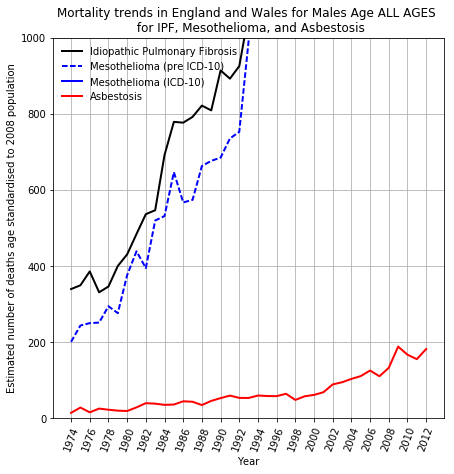

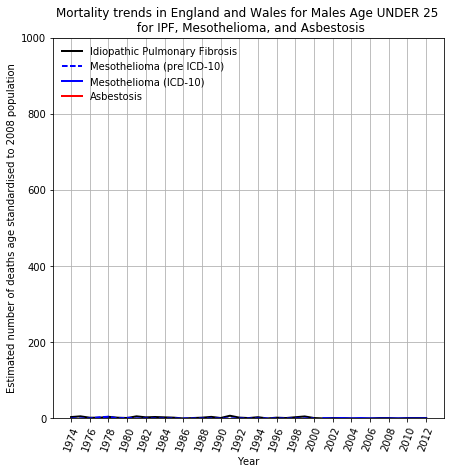

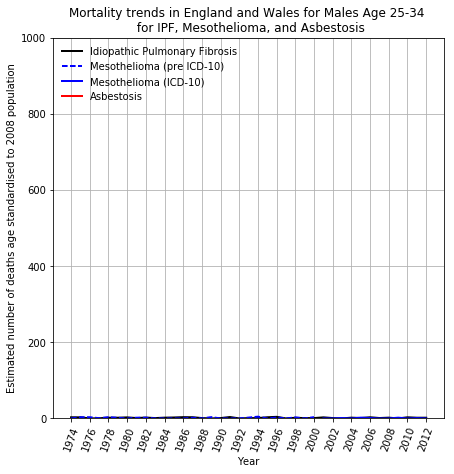

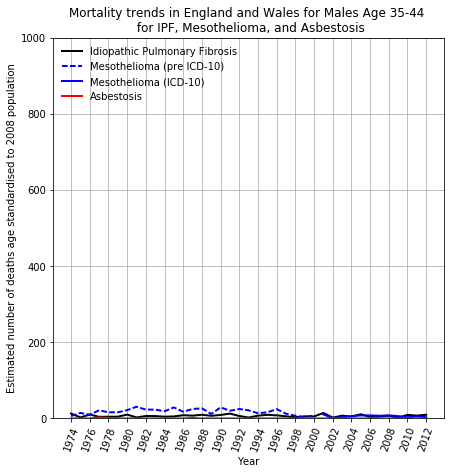

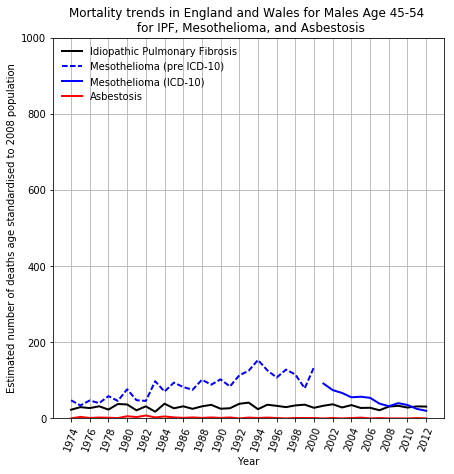

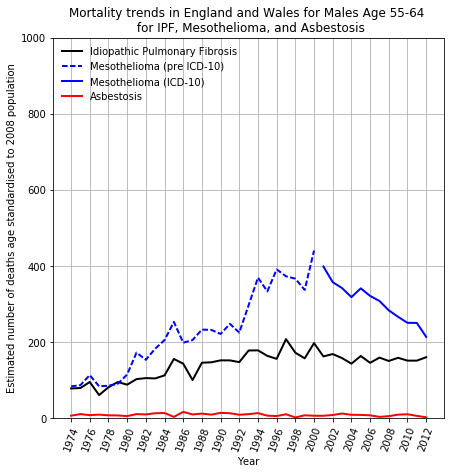

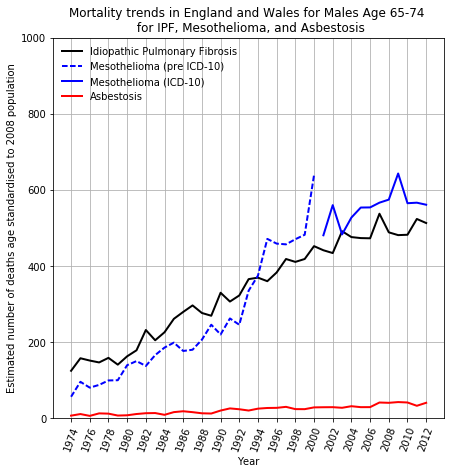

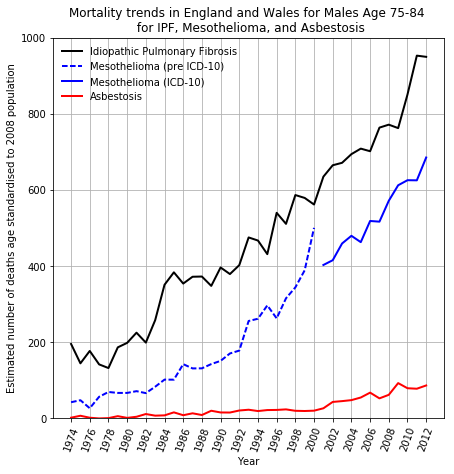

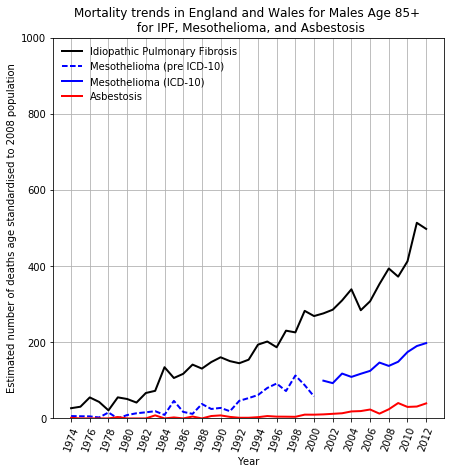

In [35]:
[makepictures(age) for age in df.Agegroup.unique()]

In [36]:
df.head()

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)"
Year,,,,,,,,,,,
1974-01-01,NORTH EAST,ALL AGES,26.0,Male,1974-01-01,IPF,1536100.0,1256065.0,1.692598,21.260133,1.692598
1974-01-01,NORTH EAST,ALL AGES,1.0,Male,1974-01-01,Asbestosis,1536100.0,1256065.0,0.065100,0.817697,0.065100
1974-01-01,NORTH EAST,ALL AGES,12.5,Male,1974-01-01,All Mesothelioma,1536100.0,1256065.0,0.813749,10.221218,0.813749
1974-01-01,NORTH EAST,UNDER 25,0.0,Male,1974-01-01,IPF,615500.0,405899.0,0.000000,0.000000,0.000000
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,IPF,203300.0,149126.0,0.000000,0.000000,0.000000


In [37]:
df.Agegroup.unique()

array(['ALL AGES', 'UNDER 25', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75-84', '85+'], dtype=object)

In [38]:
df.head()

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)"
Year,,,,,,,,,,,
1974-01-01,NORTH EAST,ALL AGES,26.0,Male,1974-01-01,IPF,1536100.0,1256065.0,1.692598,21.260133,1.692598
1974-01-01,NORTH EAST,ALL AGES,1.0,Male,1974-01-01,Asbestosis,1536100.0,1256065.0,0.065100,0.817697,0.065100
1974-01-01,NORTH EAST,ALL AGES,12.5,Male,1974-01-01,All Mesothelioma,1536100.0,1256065.0,0.813749,10.221218,0.813749
1974-01-01,NORTH EAST,UNDER 25,0.0,Male,1974-01-01,IPF,615500.0,405899.0,0.000000,0.000000,0.000000
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,IPF,203300.0,149126.0,0.000000,0.000000,0.000000


In [39]:
df.Agegroup.unique()

array(['ALL AGES', 'UNDER 25', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75-84', '85+'], dtype=object)

In [40]:
agemidpoint = {'ALL AGES': 100, 'UNDER 25': 20, '25-34':30, '35-44':40, '45-54':50, '55-64':60, '65-74':70, '75-84':80, '85+':90}

In [41]:
agemidpoint.get('ALL AGES')

100

In [42]:
df['Agemidpoint'] = df.Agegroup.map(lambda x: agemidpoint.get(x))

In [43]:
df['YearOfDeath'] = df.Year.map(lambda x: x.year)

In [44]:
df['dob'] = df['YearOfDeath'] - df['Agemidpoint']

In [45]:
# df = df[(df.Agemidpoint < 80) & (df.dob < 1970)] # limit to people ages under 51 at death and born before 1970

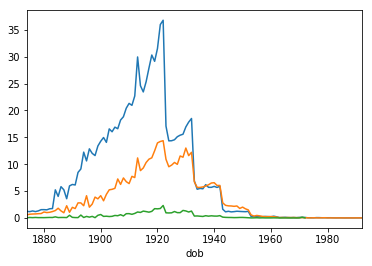

In [46]:
df[df.Cause == 'IPF'].groupby('dob')['Rate per 100,000 (standardised)'].mean().plot()
df[df.Cause == 'All Mesothelioma'].groupby('dob')['Rate per 100,000 (standardised)'].mean().plot()
df[df.Cause == 'Asbestosis'].groupby('dob')['Rate per 100,000 (standardised)'].mean().plot()

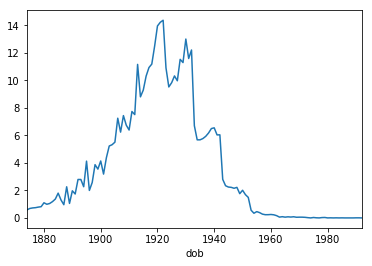

In [47]:
df[df.Cause == 'All Mesothelioma'].groupby('dob')['Rate per 100,000 (standardised)'].mean().plot()

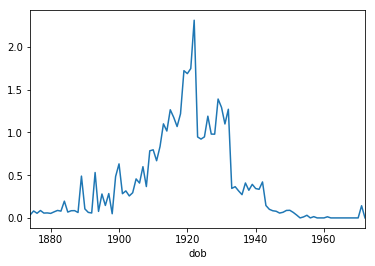

In [48]:
df[df.Cause == 'Asbestosis'].groupby('dob')['Rate per 100,000 (standardised)'].mean().plot()

In [49]:
df1 = df[(df['dob'] == 1949) & (df['Cause'] == 'IPF') & (df['Sex'] == 'Male')]

In [50]:
df1.groupby('Year')['Estimated deaths age standardised to 2008 population'].sum()

Year
1979-01-01      1.853188
1989-01-01      6.925657
1999-01-01     36.145390
2009-01-01    159.317348
Name: Estimated deaths age standardised to 2008 population, dtype: float64

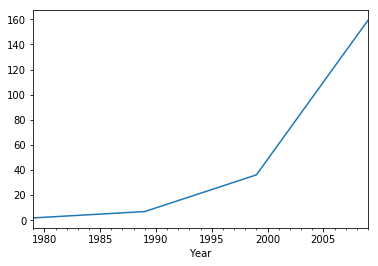

In [51]:
df1.groupby('Year')['Estimated deaths age standardised to 2008 population'].sum().plot()

In [52]:
df.dob.dropna().unique()

array([1874, 1954, 1944, 1934, 1924, 1914, 1904, 1894, 1884, 1875, 1955,
       1945, 1935, 1925, 1915, 1905, 1895, 1885, 1876, 1956, 1946, 1936,
       1926, 1916, 1906, 1896, 1886, 1877, 1957, 1947, 1937, 1927, 1917,
       1907, 1897, 1887, 1878, 1958, 1948, 1938, 1928, 1918, 1908, 1898,
       1888, 1879, 1959, 1949, 1939, 1929, 1919, 1909, 1899, 1889, 1880,
       1960, 1950, 1940, 1930, 1920, 1910, 1900, 1890, 1881, 1961, 1951,
       1941, 1931, 1921, 1911, 1901, 1891, 1882, 1962, 1952, 1942, 1932,
       1922, 1912, 1902, 1892, 1883, 1963, 1953, 1943, 1933, 1923, 1913,
       1903, 1893, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992])

In [53]:
df = df[df['Agemidpoint'] != 100.0]

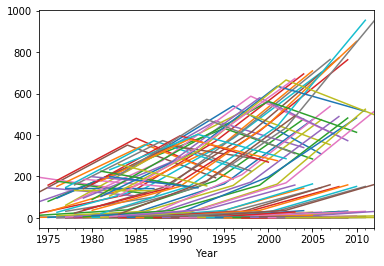

In [54]:
 for dob in df.dob.dropna().unique():
        df[(df['dob'] == dob) & (df['Cause'] == 'IPF') & (df['Sex'] == 'Male')].groupby('Year')['Estimated deaths age standardised to 2008 population'].sum().plot()

In [55]:
df.dob.min()

1884

In [56]:
df.dob.max()

1992

In [57]:
df.dob.describe()

count    15324.000000
mean      1934.333594
std         24.107926
min       1884.000000
25%       1916.000000
50%       1933.000000
75%       1952.000000
max       1992.000000
Name: dob, dtype: float64

In [58]:
df['birthcohort'] = pd.cut(df.dob, [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990], labels=['1900-1910', '1910-1920', '1920-1930',
                                                                                    '1930-1940','1940-1950','1950-1960',
                                                                                    '1960-1970', '1970-1980', '1980-1990'])

In [59]:
df.head()

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)",Agemidpoint,YearOfDeath,dob,birthcohort
Year,,,,,,,,,,,,,,,
1974-01-01,NORTH EAST,UNDER 25,0.0,Male,1974-01-01,IPF,615500.0,405899.0,0.000000,0.000000,0.000000,20,1974,1954,1950-1960
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,IPF,203300.0,149126.0,0.000000,0.000000,0.000000,30,1974,1944,1940-1950
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,All Mesothelioma,203300.0,149126.0,0.000000,0.000000,0.000000,30,1974,1944,1940-1950
1974-01-01,NORTH EAST,35-44,1.0,Male,1974-01-01,IPF,183600.0,176643.0,0.544662,0.962108,0.544662,40,1974,1934,1930-1940
1974-01-01,NORTH EAST,35-44,0.0,Male,1974-01-01,Asbestosis,183600.0,176643.0,0.000000,0.000000,0.000000,40,1974,1934,1930-1940


In [60]:
df.Cause.unique()

array(['IPF', 'All Mesothelioma', 'Asbestosis'], dtype=object)

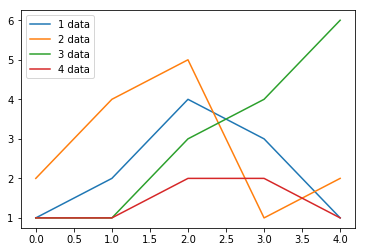

In [61]:
import matplotlib.pyplot as plt
dct = {'list_1' : [1,2,4,3,1],'list_2' : [2,4,5,1,2],
       'list_3' : [1,1,3,4,6],'list_4' : [1,1,2,2,1]}

xs = [0,1,2,3,4]

lines = []    
for i in range(1,5):
    lines += plt.plot(xs,dct['list_%s' %i], label="{} data".format(i))
    
labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
plt.show()

In [62]:
lines

In [63]:
df.head()

,Region,Agegroup,Deaths,Sex,Year,Cause,Population,2008 population,"Rate per 100,000 population",Estimated deaths age standardised to 2008 population,"Rate per 100,000 (standardised)",Agemidpoint,YearOfDeath,dob,birthcohort
Year,,,,,,,,,,,,,,,
1974-01-01,NORTH EAST,UNDER 25,0.0,Male,1974-01-01,IPF,615500.0,405899.0,0.000000,0.000000,0.000000,20,1974,1954,1950-1960
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,IPF,203300.0,149126.0,0.000000,0.000000,0.000000,30,1974,1944,1940-1950
1974-01-01,NORTH EAST,25-34,0.0,Male,1974-01-01,All Mesothelioma,203300.0,149126.0,0.000000,0.000000,0.000000,30,1974,1944,1940-1950
1974-01-01,NORTH EAST,35-44,1.0,Male,1974-01-01,IPF,183600.0,176643.0,0.544662,0.962108,0.544662,40,1974,1934,1930-1940
1974-01-01,NORTH EAST,35-44,0.0,Male,1974-01-01,Asbestosis,183600.0,176643.0,0.000000,0.000000,0.000000,40,1974,1934,1930-1940


In [64]:
for cohort in df.birthcohort.dropna().unique():
    print cohort


1950-1960
1940-1950
1930-1940
1920-1930
1910-1920
1900-1910
1960-1970
1970-1980
1980-1990


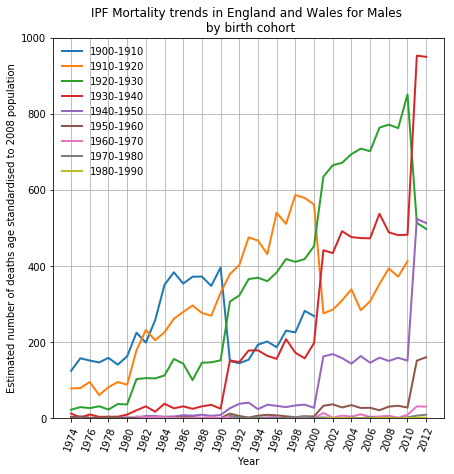

In [80]:
# nine lines

df_male = df[(df['Sex'] == 'Male')]

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1900-1910')].groupby('Year')
data = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1910-1920')].groupby('Year')
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1920-1930')].groupby('Year')
data2 = grp['Estimated deaths age standardised to 2008 population'].sum()


grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1930-1940')].groupby('Year')
data3 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1940-1950')].groupby('Year')
data4 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1950-1960')].groupby('Year')
data5 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1960-1970')].groupby('Year')
data6 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1970-1980')].groupby('Year')
data7 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1980-1990')].groupby('Year')
data8 = grp['Estimated deaths age standardised to 2008 population'].sum()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values

x2 = data2.index
y2 = data2.values

x3 = data3.index
y3 = data3.values

x4 = data4.index
y4 = data4.values

x5 = data5.index
y5 = data5.values

x6 = data6.index
y6 = data6.values

x7 = data7.index
y7 = data7.values

x8 = data8.index
y8 = data8.values

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()
plt.xticks(rotation=70)

plt.ylim((0,1000))
plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Year')
plt.title('IPF Mortality trends in England and Wales for Males \n by birth cohort')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
    
plt.grid(True)
p1, = plt.plot(x, y, 'C0', linewidth=2.0) 
p2, = plt.plot(x1, y1,'C1', linewidth=2.0) 
p3, = plt.plot(x2, y2,'C2', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'C3', linewidth=2.0) 
p5, = plt.plot(x4, y4,'C4', linewidth=2.0) 
p6, = plt.plot(x5, y5,'C5', linewidth=2.0) 
p7, = plt.plot(x6, y6, 'C6', linewidth=2.0) 
p8, = plt.plot(x7, y7,'C7', linewidth=2.0) 
p9, = plt.plot(x8, y8,'C8', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)

ax.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['1900-1910', '1910-1920', '1920-1930',
                                                '1930-1940','1940-1950','1950-1960',
                                                '1960-1970', '1970-1980', '1980-1990'], loc='upper left', frameon=False)

plt.savefig('.././fig/Idiopathic Pulmonary Fibrosis Mortality By Birth Cohort.png')

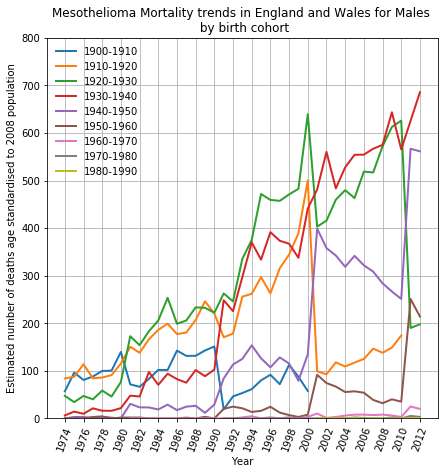

In [66]:
# nine lines

df_male = df[(df['Sex'] == 'Male')]

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1900-1910')].groupby('Year')
data = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1910-1920')].groupby('Year')
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1920-1930')].groupby('Year')
data2 = grp['Estimated deaths age standardised to 2008 population'].sum()


grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1930-1940')].groupby('Year')
data3 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1940-1950')].groupby('Year')
data4 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1950-1960')].groupby('Year')
data5 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1960-1970')].groupby('Year')
data6 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1970-1980')].groupby('Year')
data7 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1980-1990')].groupby('Year')
data8 = grp['Estimated deaths age standardised to 2008 population'].sum()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values

x2 = data2.index
y2 = data2.values

x3 = data3.index
y3 = data3.values

x4 = data4.index
y4 = data4.values

x5 = data5.index
y5 = data5.values

x6 = data6.index
y6 = data6.values

x7 = data7.index
y7 = data7.values

x8 = data8.index
y8 = data8.values

major = mdates.YearLocator(2)
minor = mdates.MonthLocator()
plt.xticks(rotation=70)

plt.ylim((0,800))
plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Year')
plt.title('Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
    
plt.grid(True)
p1, = plt.plot(x, y, 'C0', linewidth=2.0) 
p2, = plt.plot(x1, y1,'C1', linewidth=2.0) 
p3, = plt.plot(x2, y2,'C2', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'C3', linewidth=2.0) 
p5, = plt.plot(x4, y4,'C4', linewidth=2.0) 
p6, = plt.plot(x5, y5,'C5', linewidth=2.0) 
p7, = plt.plot(x6, y6, 'C6', linewidth=2.0) 
p8, = plt.plot(x7, y7,'C7', linewidth=2.0) 
p9, = plt.plot(x8, y8,'C8', linewidth=2.0) 

ax = plt.gca()
ax.xaxis.set_major_locator(major)

ax.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['1900-1910', '1910-1920', '1920-1930',
                                                '1930-1940','1940-1950','1950-1960',
                                                '1960-1970', '1970-1980', '1980-1990'], loc='upper left', frameon=False)

plt.savefig('.././fig/Mesothelioma Mortality By Birth Cohort.png')

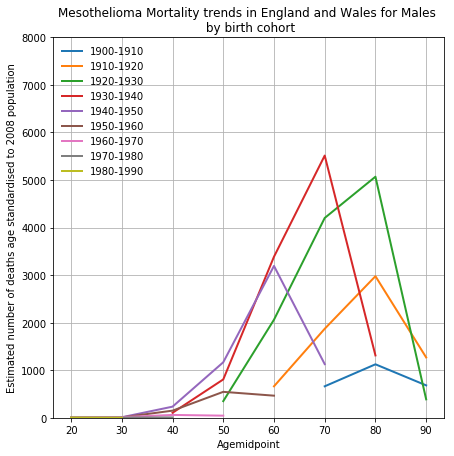

In [81]:
df_male = df[(df['Sex'] == 'Male')]

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1900-1910')].groupby('Agemidpoint')
data = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1910-1920')].groupby('Agemidpoint')
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1920-1930')].groupby('Agemidpoint')
data2 = grp['Estimated deaths age standardised to 2008 population'].sum()


grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1930-1940')].groupby('Agemidpoint')
data3 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1940-1950')].groupby('Agemidpoint')
data4 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1950-1960')].groupby('Agemidpoint')
data5 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1960-1970')].groupby('Agemidpoint')
data6 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1970-1980')].groupby('Agemidpoint')
data7 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'All Mesothelioma') & (df_male['birthcohort'] == '1980-1990')].groupby('Agemidpoint')
data8 = grp['Estimated deaths age standardised to 2008 population'].sum()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values

x2 = data2.index
y2 = data2.values

x3 = data3.index
y3 = data3.values

x4 = data4.index
y4 = data4.values

x5 = data5.index
y5 = data5.values

x6 = data6.index
y6 = data6.values

x7 = data7.index
y7 = data7.values

x8 = data8.index
y8 = data8.values

plt.ylim((0,8000))

plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Agemidpoint')
plt.title('Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
    
plt.grid(True)
p1, = plt.plot(x, y, 'C0', linewidth=2.0) 
p2, = plt.plot(x1, y1,'C1', linewidth=2.0) 
p3, = plt.plot(x2, y2,'C2', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'C3', linewidth=2.0) 
p5, = plt.plot(x4, y4,'C4', linewidth=2.0) 
p6, = plt.plot(x5, y5,'C5', linewidth=2.0) 
p7, = plt.plot(x6, y6, 'C6', linewidth=2.0) 
p8, = plt.plot(x7, y7,'C7', linewidth=2.0) 
p9, = plt.plot(x8, y8,'C8', linewidth=2.0) 

ax = plt.gca()

ax.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['1900-1910', '1910-1920', '1920-1930',
                                                '1930-1940','1940-1950','1950-1960',
                                                '1960-1970', '1970-1980', '1980-1990'], loc='upper left', frameon=False)

plt.savefig('.././fig/Age Specific Mesothelioma Mortality By Birth Cohort.png')


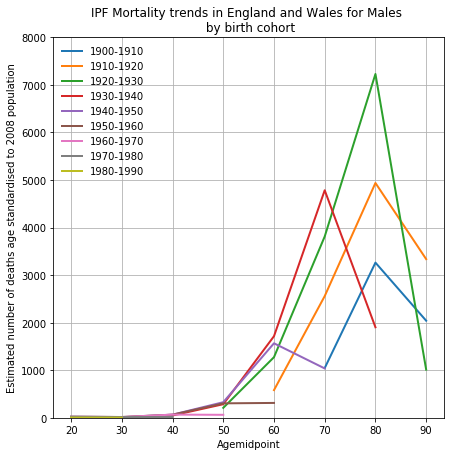

In [77]:
df_male = df[(df['Sex'] == 'Male')]

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1900-1910')].groupby('Agemidpoint')
data = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1910-1920')].groupby('Agemidpoint')
data1 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1920-1930')].groupby('Agemidpoint')
data2 = grp['Estimated deaths age standardised to 2008 population'].sum()


grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1930-1940')].groupby('Agemidpoint')
data3 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1940-1950')].groupby('Agemidpoint')
data4 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1950-1960')].groupby('Agemidpoint')
data5 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1960-1970')].groupby('Agemidpoint')
data6 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1970-1980')].groupby('Agemidpoint')
data7 = grp['Estimated deaths age standardised to 2008 population'].sum()

grp = df_male[(df_male['Cause'] == 'IPF') & (df_male['birthcohort'] == '1980-1990')].groupby('Agemidpoint')
data8 = grp['Estimated deaths age standardised to 2008 population'].sum()

plt.figure(figsize=(7, 7))
x = data.index
y = data.values

x1 = data1.index
y1 = data1.values

x2 = data2.index
y2 = data2.values

x3 = data3.index
y3 = data3.values

x4 = data4.index
y4 = data4.values

x5 = data5.index
y5 = data5.values

x6 = data6.index
y6 = data6.values

x7 = data7.index
y7 = data7.values

x8 = data8.index
y8 = data8.values

plt.ylim((0,8000))
plt.ylabel('Estimated number of deaths age standardised to 2008 population')
plt.xlabel('Agemidpoint')
plt.title('IPF Mortality trends in England and Wales for Males \n by birth cohort')
#plt.annotate("ICD-9(1979)", (pd.to_datetime('1979'), 1000), (pd.to_datetime('1976'), 1500), 
              # arrowprops=dict(arrowstyle="->")) 
#plt.annotate("ICD-10(2000)", (pd.to_datetime('2000'), 2500), (pd.to_datetime('1997'), 3000), 
              # arrowprops=dict(arrowstyle="->")) 
    
plt.grid(True)
p1, = plt.plot(x, y, 'C0', linewidth=2.0) 
p2, = plt.plot(x1, y1,'C1', linewidth=2.0) 
p3, = plt.plot(x2, y2,'C2', linewidth=2.0) 
p4, = plt.plot(x3, y3, 'C3', linewidth=2.0) 
p5, = plt.plot(x4, y4,'C4', linewidth=2.0) 
p6, = plt.plot(x5, y5,'C5', linewidth=2.0) 
p7, = plt.plot(x6, y6, 'C6', linewidth=2.0) 
p8, = plt.plot(x7, y7,'C7', linewidth=2.0) 
p9, = plt.plot(x8, y8,'C8', linewidth=2.0) 

ax = plt.gca()

ax.legend([p1, p2, p3, p4, p5, p6, p7, p8, p9], ['1900-1910', '1910-1920', '1920-1930',
                                                '1930-1940','1940-1950','1950-1960',
                                                '1960-1970', '1970-1980', '1980-1990'], loc='upper left', frameon=False)
plt.savefig('.././fig/Age Specific Idiopathic Pulmonary Fibrosis Mortality By Birth Cohort.png')


In [71]:
datas = df.groupby(['birthcohort', 'Agegroup'])['Estimated deaths age standardised to 2008 population'].sum()

In [72]:
datas.reset_index()

,birthcohort,Agegroup,Estimated deaths age standardised to 2008 population
0,1900-1910,65-74,2466.104757
1,1900-1910,75-84,6535.881343
2,1900-1910,85+,4521.292111
3,1910-1920,55-64,1774.312883
4,1910-1920,65-74,6204.477946
5,1910-1920,75-84,11548.980975
6,1910-1920,85+,8160.156406
7,1920-1930,45-54,764.453554
8,1920-1930,55-64,4354.619154
9,1920-1930,65-74,10739.709703
